# Preprocessing and Training Data Development

#### This step focuses on Pre-processing & Training Data Development.The goal of this step is to normalize and standardize all the features in your data, as well as create a validation set.


# **_Importing libraries_**

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn import linear_model, preprocessing 
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime


import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Load Data 

**_Loading Appliances Energy Usage Data_**

In [2]:
df= pd.read_csv('C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data_Files/appliances_clean_df.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])  # converting date column to date type

In [4]:
df.head()

,date,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,...,T_Teenager,H_Teenager,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,4.094345,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,4.094345,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,3.912023,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,3.912023,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,4.094345,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


### Loading the data set with feature engineering

In [5]:
df_FE= pd.read_csv('C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/Data_Files/Feature_Engineered_data.csv')

In [6]:
df_FE['date'] = pd.to_datetime(df_FE['date'])

In [7]:
df_FE.head().T

,0,1,2,3,4
date,2016-01-11 17:00:00,2016-01-11 17:10:00,2016-01-11 17:20:00,2016-01-11 17:30:00,2016-01-11 17:40:00
Appliances_E_Wh,4.094345,4.094345,3.912023,3.912023,4.094345
Lights_E_Wh,30,30,30,40,40
Avg_T_in,18.435,18.439167,18.421667,18.39625,18.40875
Avg_H_in,46.7425,46.672708,46.562917,46.46875,46.462917
Avg_T_out,6.308889,6.172222,6.008889,5.894444,5.8
Avg_H_out,60.518889,60.421111,60.085556,60.141111,60.597778
Press_out,733.5,733.6,733.7,733.8,733.9
Windspeed,7.0,6.666667,6.333333,6.0,5.666667
Visibility,63.0,59.166667,55.333333,51.5,47.666667


### Define our X (features) and y (target variable)

In [8]:
y = df['Appliances_E_Wh']

X = df.drop(["Appliances_E_Wh", "date"],axis=1)  # considering all the variables except the date 

In [9]:
y.head()

0    4.094345
1    4.094345
2    3.912023
3    3.912023
4    4.094345
Name: Appliances_E_Wh, dtype: float64

In [10]:
X.head().T   # We have a total of 25 features

,0,1,2,3,4
Lights_E_Wh,30.000000,30.000000,30.000000,40.000000,40.000000
T_Kitchen,19.890000,19.890000,19.890000,19.890000,19.890000
H_Kitchen,47.596667,46.693333,46.300000,46.066667,46.333333
T_Living,19.200000,19.200000,19.200000,19.200000,19.200000
H_Living,44.790000,44.722500,44.626667,44.590000,44.530000
T_Laundry,19.790000,19.790000,19.790000,19.790000,19.790000
H_Laundry,44.730000,44.790000,44.933333,45.000000,45.000000
T_Office,19.000000,19.000000,18.926667,18.890000,18.890000
H_Office,45.566667,45.992500,45.890000,45.723333,45.530000
T_Bathroom,17.166667,17.166667,17.166667,17.166667,17.200000


### Train/Test Split  (Creating a 70/30 train and test split)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [12]:
len(df) * .7, len(df) * .3

(13814.5, 5920.5)

In [13]:
X_train.shape, X_test.shape # X are all the features 

((13814, 25), (5921, 25))

In [14]:
y_train.shape, y_test.shape  # y is the appliances energy usage 

((13814,), (5921,))

### we need both train and test sets to be numeric

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13814 entries, 9129 to 15795
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lights_E_Wh        13814 non-null  int64  
 1   T_Kitchen          13814 non-null  float64
 2   H_Kitchen          13814 non-null  float64
 3   T_Living           13814 non-null  float64
 4   H_Living           13814 non-null  float64
 5   T_Laundry          13814 non-null  float64
 6   H_Laundry          13814 non-null  float64
 7   T_Office           13814 non-null  float64
 8   H_Office           13814 non-null  float64
 9   T_Bathroom         13814 non-null  float64
 10  H_Bathroom         13814 non-null  float64
 11  T_Building_out_NS  13814 non-null  float64
 12  H_Building_out_NS  13814 non-null  float64
 13  T_Ironning         13814 non-null  float64
 14  H_Ironing          13814 non-null  float64
 15  T_Teenager         13814 non-null  float64
 16  H_Teenager         

In [16]:
y_train.dtypes

dtype('float64')

### Initial Not-Even-A-Model

###### A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say your best guess is the average value?

In [17]:
train_mean = y_train.mean()

In [18]:
train_mean

4.304241074952732

In [19]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[4.30424107]])

In [20]:
y_tr_pred = dumb_reg.predict(X_train)

In [21]:
r2_score(y_train, y_tr_pred) # Exactly as expected, if you use the average value as your prediction, you get an  R2  of zero on our training set.

0.0

In [22]:
y_te_pred= dumb_reg.predict(X_test)

In [23]:
r2_score(y_test, y_te_pred) #Generally, you can expect performance on a test set to be slightly worse than on the training set. As you are getting an  𝑅2  of zero on the training set, there's nowhere to go but negative!

-7.248256477687676e-06

In [24]:
mean_squared_error(y_train, y_tr_pred), mean_absolute_error(y_train, y_tr_pred)  # training set error

(0.4282109172012716, 0.4891014668887801)

In [25]:
mean_squared_error(y_test, y_te_pred), mean_absolute_error(y_test, y_te_pred) # test set error

(0.436564106186244, 0.49576469899686454)

## Standarizing the features

Using Sklearn, standarizing the magnitude of the features by scaling the values.

_Note: We need to fit() our scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while we standardize our data_

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled.mean()   # should be close to 0 

1.6068738283730658e-16

In [28]:
X_train_scaled.std() # should be close to 1

1.0000000000000002

# Initial Models

### 1) Linear Regression with scaled data

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
# Make predictions using the model on both train and test splits
y_train_pred_scaled = lm.predict(X_train_scaled)
y_test_pred_scaled = lm.predict(X_test_scaled)

In [32]:
coef_scaled = lm.coef_  # coef of linear regression and sorting them based on their magnitude 

In [33]:
pd.Series(coef_scaled, index = ['Lights_E_Wh', 'T_Kitchen', 'H_Kitchen', 'T_Living', 'H_Living',
       'T_Laundry', 'H_Laundry', 'T_Office', 'H_Office', 'T_Bathroom',
      'H_Bathroom', 'T_Building_out_NS', 'H_Building_out_NS', 'T_Ironning',
       'H_Ironing', 'T_Teenager', 'H_Teenager', 'T_Parents', 'H_Parents',
       'T_out', 'Press_out', 'H_out', 'Windspeed', 'Visibility', 'Tdewpoint']).abs().sort_values(ascending=False) 

H_Kitchen            0.431165
T_out                0.400742
H_Living             0.336074
T_Building_out_NS    0.320041
T_Laundry            0.306837
H_Teenager           0.235853
T_Parents            0.221332
T_Living             0.213112
T_Teenager           0.197203
Tdewpoint            0.176389
H_out                0.131952
Lights_E_Wh          0.130742
H_Building_out_NS    0.086216
H_Laundry            0.081408
H_Parents            0.055290
T_Ironning           0.052769
T_Office             0.046510
Windspeed            0.034862
H_Ironing            0.028531
H_Bathroom           0.026734
T_Kitchen            0.026730
H_Office             0.016224
Visibility           0.011652
T_Bathroom           0.007323
Press_out            0.000765
dtype: float64

###### Top six features with large coef using scaled data are (in order): H_Kitchen, T_out , H_Living, T_Building_out_NS, T_Laundry, and            H_Teenager          

In [34]:
lm.intercept_

4.304241074952765

In [35]:
#  Assess model performance  # training and test set accuracy 
r2_score(y_train, y_train_pred_scaled), r2_score(y_test, y_test_pred_scaled)

(0.27122441785249796, 0.28012300902707965)

So here, we get a slightly better R2 on the test set than we did on the train set

###### The above score is called R-Squared coefficient, or the "coefficient of determination". It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. At the moment, our model explains only about 28% of the variation from the mean. There's more work to do!

In [36]:
mean_squared_error(y_train, y_train_pred_scaled), mean_absolute_error(y_train, y_train_pred_scaled)

(0.3120696604652725, 0.39176279572418166)

In [37]:
mean_squared_error(y_test, y_test_pred_scaled), mean_absolute_error(y_test, y_test_pred_scaled)

(0.31427017721728806, 0.3953955328312127)

### Does it make a difference if we use nonscaled data? 

In [38]:
lm_nonscaled= lm.fit(X_train, y_train)

In [39]:
# Make predictions using the model on both train and test splits
y_train_pred = lm_nonscaled.predict(X_train)
y_test_pred = lm_nonscaled.predict(X_test)

In [40]:
coef_nonscaled= lm_nonscaled.coef_

In [41]:
pd.Series(coef_nonscaled, index = ['Lights_E_Wh', 'T_Kitchen', 'H_Kitchen', 'T_Living', 'H_Living',
       'T_Laundry', 'H_Laundry', 'T_Office', 'H_Office', 'T_Bathroom',
      'H_Bathroom', 'T_Building_out_NS', 'H_Building_out_NS', 'T_Ironning',
       'H_Ironing', 'T_Teenager', 'H_Teenager', 'T_Parents', 'H_Parents',
       'T_out', 'Press_out', 'H_out', 'Windspeed', 'Visibility', 'Tdewpoint']).abs().sort_values(ascending=False) 

T_Laundry            0.153113
T_Parents            0.109617
H_Kitchen            0.108669
T_Teenager           0.100741
T_Living             0.097113
H_Living             0.082534
T_out                0.075275
T_Building_out_NS    0.052491
H_Teenager           0.045131
Tdewpoint            0.041988
H_Laundry            0.025039
T_Ironning           0.024972
T_Office             0.022742
T_Kitchen            0.016611
Lights_E_Wh          0.016391
Windspeed            0.014279
H_Parents            0.013308
H_out                0.008853
H_Ironing            0.005583
T_Bathroom           0.003964
H_Office             0.003746
H_Bathroom           0.002961
H_Building_out_NS    0.002768
Visibility           0.000984
Press_out            0.000104
dtype: float64

###### Top six features with large coef using nonscaled data are (in order):   T_Laundry, T_Parents, H_Kitchen, T_Teenager, T_Living, and H_Living.  This is very different from the scaled data set.            

In [42]:
#  Assess model performance
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.27122441785249796, 0.28012300902707965)

In [43]:
lm_nonscaled.intercept_

4.454188266781771

###### Using scaled or nonscaled data makes no difference. Going forward, we will use scaled data.  

In [44]:
mean_squared_error(y_train, y_train_pred), mean_absolute_error(y_train, y_train_pred) # same error using scaled or non-scaled data

(0.3120696604652725, 0.39176279572418127)

In [45]:
mean_squared_error(y_test, y_test_pred), mean_absolute_error(y_test, y_test_pred)

(0.31427017721728806, 0.3953955328312125)

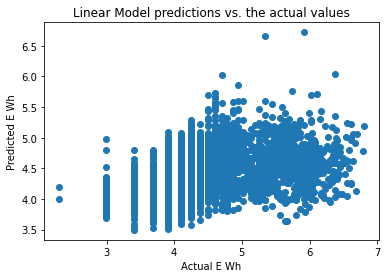

In [46]:
plt.scatter(y_test,y_test_pred)
plt.title("Linear Model predictions vs. the actual values")
plt.xlabel('Actual E Wh')
plt.ylabel('Predicted E Wh');

###### The linear model is overestimating the smaller target variable values and underestimating the larger target variable values. 

In [47]:
lm.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [48]:
from sklearn.metrics import mean_absolute_percentage_error

In [49]:
mean_absolute_percentage_error(y_test, y_test_pred)   # 8.98 % error

0.08983428057623835

### 2) OLS  (Linear model from Statsmodel). 

We expect the results to be similar to linear model 

In [50]:
X_ols = sm.add_constant(X)

In [51]:
X_ols.head()

,const,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,H_Office,...,T_Teenager,H_Teenager,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint
0,1.0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,1.0,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,1.0,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,1.0,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,1.0,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [52]:
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, y, test_size = 0.30, random_state = 42)

In [53]:
olsModel = sm.OLS(y_train, X_train_ols)

In [54]:
olsResults = olsModel.fit()   

In [55]:
olsResults.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Appliances_E_Wh   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     205.3
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        10:23:39   Log-Likelihood:                -11558.
No. Observations:               13814   AIC:                         2.317e+04
Df Residuals:                   13788   BIC:                         2.336e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4542      0.679      6.565      0.000       3.124       5.784
Lights_E_Wh           0.0164      0.001     24.190      0.000       0.015       0.018
T_Kitchen             0.0166      0.013      1.257      0.209      -0.009       0.043
H_Kitchen             0.1087      0.005     22.468      0.000       0.099       0.118
T_Living             -0.0971      0.012     -8.308      0.000      -0.120      -0.074
H_Living             -0.0825      0.005    -15.031      0.000      -0.093      -0.072
T_Laundry             0.1531      0.008     20.291      0.000       0.138       0.168
H_Laundry             0.0250      0.005      5.183      0.000       0.016       0.035
T_Office             -0.0227      0.007     -3.087      0.002      -0.037      -0.008
H_Office             -0.0037      0.005     -0.828      0.408      -0.013       0.005
T_Bathroom            0.0040      0.008      0.475      0.634      -0.012       0.020
H_Bathroom            0.0030      0.001      4.792      0.000       0.002       0.004
T_Building_out_NS     0.0525      0.005     11.552      0.000       0.044       0.061
H_Building_out_NS     0.0028      0.000      5.744      0.000       0.002       0.004
T_Ironning           -0.0250      0.009     -2.666      0.008      -0.043      -0.007
H_Ironing            -0.0056      0.003     -1.832      0.067      -0.012       0.000
T_Teenager            0.1007      0.007     14.473      0.000       0.087       0.114
H_Teenager           -0.0451      0.003    -16.999      0.000      -0.050      -0.040
T_Parents            -0.1096      0.013     -8.733      0.000      -0.134      -0.085
H_Parents            -0.0133      0.003     -4.570      0.000      -0.019      -0.008
T_out                -0.0753      0.011     -6.888      0.000      -0.097      -0.054
Press_out            -0.0001      0.001     -0.135      0.892      -0.002       0.001
H_out                -0.0089      0.002     -3.932      0.000      -0.013      -0.004
Windspeed             0.0143      0.002      5.791      0.000       0.009       0.019
Visibility            0.0010      0.000      2.403      0.016       0.000       0.002
Tdewpoint             0.0420      0.011      3.959      0.000       0.021       0.063
==============================================================================
Omnibus:                     3248.039   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8046.581
Skew:                           1.294   Prob(JB):                         0.00
Kurtosis:                       5.699   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

In [56]:
# Make predictions using the model on both train and test splits
y_train_pred_ols = olsResults.predict(X_train_ols)
y_test_pred_ols = olsResults.predict(X_test_ols)

In [57]:
#  Assess model performance
r2_score(y_train_ols, y_train_pred_ols), r2_score(y_test_ols, y_test_pred_ols)

(0.27122441785249796, 0.28012300902707943)

#### We get the exact same results we got from the linear model 

In [58]:
mean_squared_error(y_train_ols, y_train_pred_ols), mean_absolute_error(y_train_ols, y_train_pred_ols)

(0.3120696604652725, 0.3917627957241821)

In [59]:
mean_squared_error(y_test_ols, y_test_pred_ols), mean_absolute_error(y_test_ols, y_test_pred_ols)

(0.31427017721728817, 0.39539553283121337)

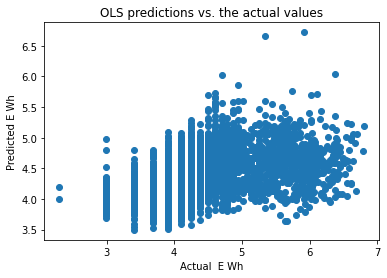

In [60]:
plt.scatter(y_test_ols,y_test_pred_ols)
plt.title("OLS predictions vs. the actual values")
plt.xlabel('Actual  E Wh')
plt.ylabel('Predicted E Wh');

In [61]:
mean_absolute_percentage_error(y_test_ols, y_test_pred_ols)

0.08983428057623864

### 3) OLS Removing the variables with large p_values

In [62]:
X_ols2 = df.drop(["Appliances_E_Wh", "date", "T_Kitchen", "H_Office", "T_Bathroom", "Press_out"],axis=1)  # Removing the variables with large p_values

In [63]:
X_ols2 = sm.add_constant(X_ols2)

In [64]:
X_train_ols2, X_test_ols2, y_train_ols2, y_test_ols2 = train_test_split(X_ols2, y, test_size = 0.30, random_state = 42)

In [65]:
olsModel2 = sm.OLS(y_train_ols2, X_train_ols2)

In [66]:
olsResults2 = olsModel2.fit()   

In [67]:
olsResults2.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Appliances_E_Wh   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     244.3
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        10:23:40   Log-Likelihood:                -11559.
No. Observations:               13814   AIC:                         2.316e+04
Df Residuals:                   13792   BIC:                         2.333e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3379      0.249     17.398      0.000       3.849       4.827
Lights_E_Wh           0.0163      0.001     24.434      0.000       0.015       0.018
H_Kitchen             0.1053      0.004     24.982      0.000       0.097       0.114
T_Living             -0.0892      0.008    -10.960      0.000      -0.105      -0.073
H_Living             -0.0801      0.005    -17.246      0.000      -0.089      -0.071
T_Laundry             0.1580      0.007     23.237      0.000       0.145       0.171
H_Laundry             0.0241      0.005      5.101      0.000       0.015       0.033
T_Office             -0.0189      0.007     -2.817      0.005      -0.032      -0.006
H_Bathroom            0.0030      0.001      5.041      0.000       0.002       0.004
T_Building_out_NS     0.0506      0.004     11.743      0.000       0.042       0.059
H_Building_out_NS     0.0028      0.000      5.882      0.000       0.002       0.004
T_Ironning           -0.0235      0.009     -2.542      0.011      -0.042      -0.005
H_Ironing            -0.0060      0.003     -2.052      0.040      -0.012      -0.000
T_Teenager            0.1039      0.006     16.171      0.000       0.091       0.116
H_Teenager           -0.0455      0.003    -17.256      0.000      -0.051      -0.040
T_Parents            -0.1103      0.011     -9.726      0.000      -0.133      -0.088
H_Parents            -0.0141      0.003     -5.060      0.000      -0.020      -0.009
T_out                -0.0723      0.011     -6.768      0.000      -0.093      -0.051
H_out                -0.0085      0.002     -3.812      0.000      -0.013      -0.004
Windspeed             0.0145      0.002      6.173      0.000       0.010       0.019
Visibility            0.0010      0.000      2.459      0.014       0.000       0.002
Tdewpoint             0.0399      0.010      3.832      0.000       0.019       0.060
==============================================================================
Omnibus:                     3237.743   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7994.004
Skew:                           1.291   Prob(JB):                         0.00
Kurtosis:                       5.687   Cond. No.                     8.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### No improvement was observed. Smaller Cond. No was obtained. 


In [68]:
# Make predictions using the model on both train and test splits
y_train_pred_ols2 = olsResults2.predict(X_train_ols2)
y_test_pred_ols2 = olsResults2.predict(X_test_ols2)

In [69]:
#  Assess model performance
r2_score(y_train_ols2, y_train_pred_ols2), r2_score(y_test_ols2, y_test_pred_ols2)

(0.2710894226396282, 0.2801303117797105)

In [70]:
mean_squared_error(y_train_ols2, y_train_pred_ols2), mean_absolute_error(y_train_ols2, y_train_pred_ols2)

(0.3121274668891932, 0.39208236813631736)

In [71]:
mean_squared_error(y_test_ols2, y_test_pred_ols2), mean_absolute_error(y_test_ols2, y_test_pred_ols2)

(0.3142669891207212, 0.3955430728551369)

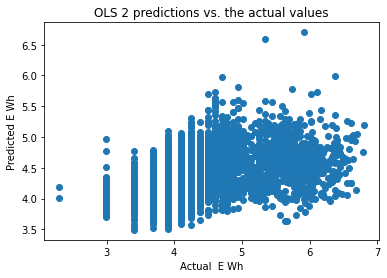

In [72]:
plt.scatter(y_test_ols2,y_test_pred_ols2)
plt.title("OLS 2 predictions vs. the actual values")
plt.xlabel('Actual  E Wh')
plt.ylabel('Predicted E Wh');

In [73]:
mean_absolute_percentage_error(y_test_ols2, y_test_pred_ols2)

0.08988183242063194

### Investigating the optimum number of features using the Linear model

#### Define the pipeline

In [74]:
lm_pipe = make_pipeline(StandardScaler(), SelectKBest(f_regression), 
    LinearRegression())   # We will look into the number of features and how the k value affect the R2

###### Looking at how number of features will affect R2 score using the linear model 

In [75]:
lm_r2_scores={}
for k in range(1,26):
    lm_pipe = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = k), 
    LinearRegression()) 
    lm_pipe.fit(X_train, y_train)
    y_te_pred =lm_pipe.predict(X_test)
    lm_r2_scores[k]= r2_score(y_test, y_te_pred)

In [76]:
lm_r2_scores

{1: 0.0687883074984117,
 2: 0.1289511403284258,
 3: 0.13952661149957346,
 4: 0.14021476546706968,
 5: 0.14982899771482827,
 6: 0.1493231896307784,
 7: 0.16585274202169153,
 8: 0.1826907916714623,
 9: 0.1881405953249019,
 10: 0.1916816738660314,
 11: 0.2064447177056783,
 12: 0.2074369086885045,
 13: 0.21800642560160166,
 14: 0.21818639553561814,
 15: 0.22116896824886723,
 16: 0.22669504975646004,
 17: 0.24050379908630948,
 18: 0.24275566918934266,
 19: 0.2758557102863186,
 20: 0.27590332970191755,
 21: 0.27645494963483264,
 22: 0.27782126811033625,
 23: 0.27779338225123773,
 24: 0.28037839897889705,
 25: 0.28012300902707965}

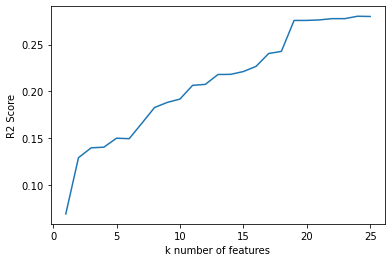

In [77]:
plt.plot(*zip(*sorted(lm_r2_scores.items())))
plt.xlabel('k number of features')
plt.ylabel('R2 Score')       
plt.show()

Selecting lower number of features has made things worse! Clearly selecting a subset of features has an impact on performance. 

###### This shows that with the linear model we need all the features. 

In [78]:
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=25,
                             score_func=<function f_regression at 0x000002426CA45430>)),
                ('linearregression', LinearRegression())])

In [79]:
y_tr_pred = lm_pipe.predict(X_train)
y_te_pred = lm_pipe.predict(X_test)

In [80]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.27122441785249796, 0.28012300902707965)

###### Using all the 25 features within the pipeline resulted in the same performance as linear model 

### Assessing performance using cross-validation¶

In [81]:
cv_results = cross_validate(lm_pipe, X_train, y_train, cv=5)

In [82]:
cv_scores = cv_results['test_score']
cv_scores

array([0.23487158, 0.29356567, 0.27117085, 0.26709365, 0.27187707])

In [83]:
np.mean(cv_scores), np.std(cv_scores)

(0.26771576455040813, 0.01884992944334577)

#### 95% confidence interval for the linear model R2 on the training set 

In [84]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.23, 0.31])

In [85]:
lm_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [86]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}
grid_params

{'selectkbest__k': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25]}

In [87]:
lm_grid_cv = GridSearchCV(lm_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [88]:
lm_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=25,
                                                    score_func=<function f_regression at 0x000002426CA45430>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25]})

In [89]:
pd.DataFrame(lm_grid_cv.cv_results_)[['param_selectkbest__k', 'mean_test_score','rank_test_score']]

,param_selectkbest__k,mean_test_score,rank_test_score
0,1,0.067233,25
1,2,0.127100,24
2,3,0.138926,23
3,4,0.139481,22
4,5,0.147400,21
5,6,0.147432,20
6,7,0.160277,19
7,8,0.176557,18
8,9,0.184239,17
9,10,0.188229,16


##### All 25 features give the best perfroamce during the training 

In [90]:
score_mean = lm_grid_cv.cv_results_['mean_test_score']
score_std = lm_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lm_grid_cv.cv_results_['param_selectkbest__k']]

In [91]:
score_mean

array([0.06723301, 0.12710014, 0.13892565, 0.13948063, 0.14739965,
       0.14743156, 0.1602771 , 0.17655704, 0.18423921, 0.18822904,
       0.20043867, 0.20146988, 0.20924761, 0.20941193, 0.2127878 ,
       0.22350254, 0.23103297, 0.24782427, 0.26486978, 0.26477705,
       0.26538928, 0.26649949, 0.26709116, 0.26730952, 0.26771576])

In [92]:
np.mean(score_mean), np.std(score_mean)

(0.2030496303157326, 0.05404005039213768)

In [93]:
lm_grid_cv.best_params_

{'selectkbest__k': 25}

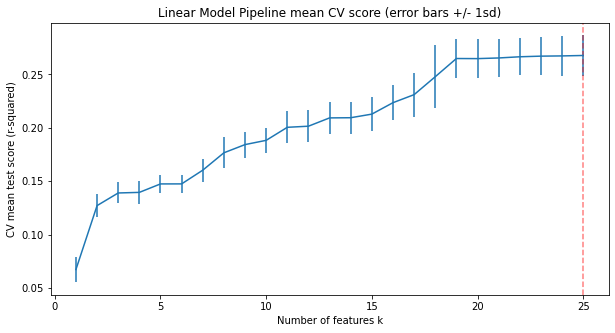

In [94]:
best_k = lm_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('Number of features k')
plt.ylabel('CV mean test score (r-squared)')
plt.title('Linear Model Pipeline mean CV score (error bars +/- 1sd)');

##### Again, we can visually see that all 25 features give the best performance during the training

In [99]:
selected = lm_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [100]:
coefs_lm = lm_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs_lm, index=features).abs().sort_values(ascending= False)

H_Kitchen            0.431165
T_out                0.400742
H_Living             0.336074
T_Building_out_NS    0.320041
T_Laundry            0.306837
H_Teenager           0.235853
T_Parents            0.221332
T_Living             0.213112
T_Teenager           0.197203
Tdewpoint            0.176389
H_out                0.131952
Lights_E_Wh          0.130742
H_Building_out_NS    0.086216
H_Laundry            0.081408
H_Parents            0.055290
T_Ironning           0.052769
T_Office             0.046510
Windspeed            0.034862
H_Ironing            0.028531
H_Bathroom           0.026734
T_Kitchen            0.026730
H_Office             0.016224
Visibility           0.011652
T_Bathroom           0.007323
Press_out            0.000765
dtype: float64

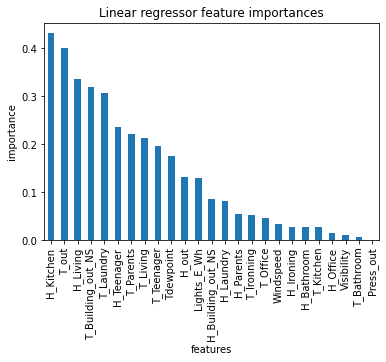

In [101]:
pd.Series(coefs_lm, index=features).abs().sort_values(ascending= False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Linear regressor feature importances');

##### These results suggest that H_Kitchen is our feature with largest coef, followed by T_out, H_Living, T_Building_out_NS, T_Laundry, and H_Teenager. 

###### We perfrom the same analyis (k sensetivity) using RF model 

# RandomForest 

In [102]:
r2_dict={}
for k in range(1,26):
    RF_pipe = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = k), RandomForestRegressor())
    RF_pipe.fit(X_train, y_train)
    y_te_pred =RF_pipe.predict(X_test)
    r2_dict[k]= r2_score(y_test, y_te_pred)

In [103]:
r2_dict

{1: 0.07376448991943496,
 2: 0.0860017497928296,
 3: 0.09919132936116848,
 4: 0.4184311278534023,
 5: 0.5080829915657723,
 6: 0.5730829697199535,
 7: 0.6079224023534147,
 8: 0.6317884118188579,
 9: 0.642689478642877,
 10: 0.650993612379938,
 11: 0.6539006976937904,
 12: 0.6618929111382104,
 13: 0.6648156846764778,
 14: 0.6737877409133577,
 15: 0.6724946381950294,
 16: 0.6700017627613861,
 17: 0.6714108883519057,
 18: 0.6711540014426715,
 19: 0.6679058820886703,
 20: 0.6683523646169782,
 21: 0.6699298854540702,
 22: 0.6704640695987034,
 23: 0.6720577844577083,
 24: 0.6691750651746253,
 25: 0.6708049573581362}

###### It seems the best number of features is 14 in this case!

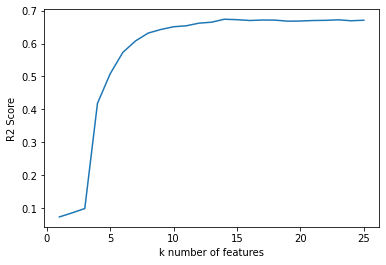

In [104]:
plt.plot(*zip(*sorted(r2_dict.items())))
plt.xlabel('k number of features')
plt.ylabel('R2 Score')       
plt.show()

In [105]:
RF_pipe = make_pipeline(StandardScaler(), SelectKBest(f_regression), 
    RandomForestRegressor())  

RF_pipe = make_pipeline(StandardScaler(), SelectKBest(f_regression, k = 25), 
    RandomForestRegressor(random_state=42))

In [106]:
RF_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000002426CA45430>)),
                ('randomforestregressor', RandomForestRegressor())])

In [107]:
y_tr_pred = RF_pipe.predict(X_train)
y_te_pred =RF_pipe.predict(X_test)

In [108]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)  # scores on training and test set

(0.9487040530137225, 0.6511376572215044)

### Assessing performance using cross-validation¶

In [109]:
cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [110]:
cv_scores = cv_results['test_score']
cv_scores

array([0.56825713, 0.59799165, 0.61542851, 0.60028162, 0.60510584])

In [111]:
np.mean(cv_scores), np.std(cv_scores)

(0.5974129492322537, 0.015763040660466163)

#### 95% confidence interval for the RF model R2 on the training set 

In [112]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.57, 0.63])

In [113]:
RF_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

In [114]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}
grid_params

{'selectkbest__k': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25]}

In [115]:
RF_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [116]:
RF_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002426CA45430>)),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25]})

In [117]:
pd.DataFrame(RF_grid_cv.cv_results_)[['param_selectkbest__k', 'mean_test_score','rank_test_score']]

,param_selectkbest__k,mean_test_score,rank_test_score
0,1,0.071082,24
1,2,0.068391,25
2,3,0.098485,23
3,4,0.365387,22
4,5,0.451528,21
5,6,0.513920,20
6,7,0.553388,19
7,8,0.574040,18
8,9,0.591239,17
9,10,0.597645,16


##### Having 22 features out of 25 features give the best perfroamce (# 1 rank) during the training using RF model

In [118]:
score_mean = RF_grid_cv.cv_results_['mean_test_score']
score_std = RF_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lm_grid_cv.cv_results_['param_selectkbest__k']]

In [119]:
score_mean

array([0.07108214, 0.06839083, 0.09848525, 0.36538707, 0.45152811,
       0.51392024, 0.55338757, 0.57403959, 0.59123893, 0.59764473,
       0.60142648, 0.60850412, 0.60992754, 0.61295194, 0.6155291 ,
       0.61599011, 0.61796838, 0.61856889, 0.62041128, 0.62278593,
       0.62361315, 0.62897022, 0.62661946, 0.62484329, 0.62711382])

In [120]:
np.mean(score_mean), np.std(score_mean)

(0.5264131271242638, 0.17570752549315813)

In [121]:
RF_grid_cv.best_params_

{'selectkbest__k': 22}

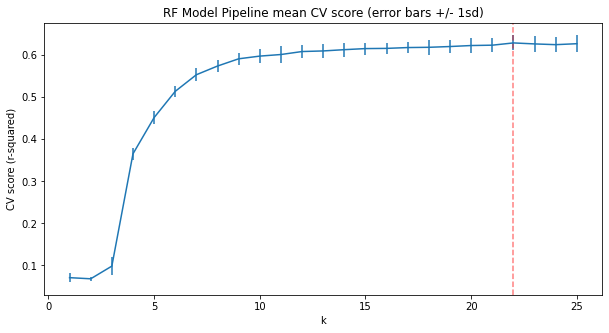

In [122]:
best_k = RF_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('RF Model Pipeline mean CV score (error bars +/- 1sd)');

##### Again, we can visually see that having 22 features out of 25 features give the best perfroamce during the training 

In [123]:
selected = RF_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True])

In [124]:
coefs_rf = RF_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
features = X_train.columns[selected]
pd.Series(coefs_rf, index=features).sort_values(ascending= False)

H_out                0.083707
Lights_E_Wh          0.074437
H_Kitchen            0.073573
H_Teenager           0.067961
Press_out            0.055724
T_Living             0.048524
T_Teenager           0.047794
T_Laundry            0.046586
H_Bathroom           0.045731
H_Parents            0.043798
H_Living             0.043660
H_Building_out_NS    0.042465
T_Bathroom           0.041172
H_Ironing            0.037946
Tdewpoint            0.036226
T_Office             0.034383
T_Building_out_NS    0.034163
Windspeed            0.032256
T_Parents            0.031052
T_Ironning           0.026623
T_Kitchen            0.026348
T_out                0.025872
dtype: float64

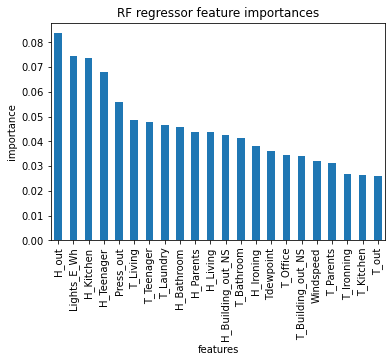

In [125]:
pd.Series(coefs_rf, index=features).sort_values(ascending= False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('RF regressor feature importances');

# Data quantity assessment

We also need to know if we have enough data points or need to undertake further data collection. Would more data be useful? We're often led to believe more data is always good, but gathering data invariably has a cost associated with it. Assess this trade off by seeing how performance varies with differing data set sizes. The learning_curve function does this conveniently.

In [126]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(lm_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [127]:
test_scores_mean

array([0.26123079, 0.2615001 , 0.26330907, 0.26414664, 0.26473198,
       0.26567536, 0.26637447, 0.26675347, 0.26716173, 0.26738893,
       0.26771098])

In [135]:
train_size

array([ 2210,  2762,  3315,  3867,  4420,  4972,  5525,  6630,  8288,
        8840, 11051])

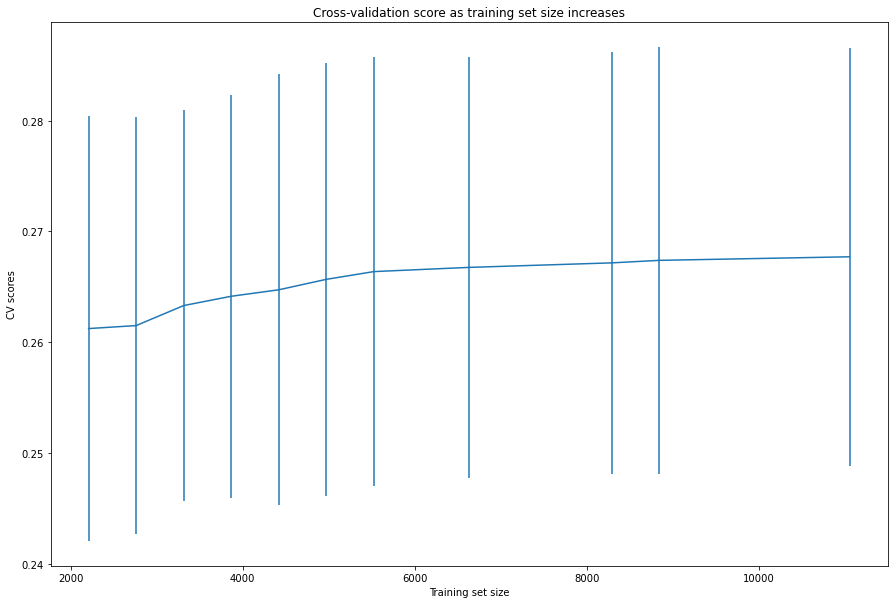

In [128]:
plt.subplots(figsize=(15, 10))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

#### This shows that we have plenty of data. There's an initial improvement in model scores as one would expect, but it's essentially levelled off by around a sample size of 8840.

# Random Forest Model

In [129]:
rf_model= RandomForestRegressor(random_state=42)

In [130]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [131]:
y_te_pred_rf = rf_model.predict(X_test_scaled)

In [132]:
y_tr_pred_rf = rf_model.predict(X_train_scaled)

In [133]:
#  Assess model performance
r2_score(y_train, y_tr_pred_rf), r2_score(y_test, y_te_pred_rf)

(0.9524085408005647, 0.6705514605411975)

In [134]:
mean_absolute_percentage_error(y_test, y_te_pred_rf)

0.056918705750176296

##### The RF model accuracy is more than double of the linear model. 